In [16]:
%matplotlib notebook
%config IPCompleter.greedy=True
import networkx as nx
import matplotlib.pyplot as plt

%config IPCompleter.greedy=True
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.add_edge.html
import matplotlib.image as mpimg
from io import BytesIO

import operator

In [17]:
def getDataFrame(pFileName, pColNameVector, pDictColValue):
    ds=open(pFileName, "rb")
    df=pd.read_excel(pFileName, index_col=False, names=pColNameVector, dtype = pDictColValue)
    ds.close()
    print(df)
    return df

In [18]:
#dataset1 : cities, distances, colors
fileName= '/usr/local/Downloads/DataSets/ticketToRide.xlsx'
namesDs1=[ "city1", "distance",  "color", "tracks", "city2"]
dictType = {"city1":"str", "distance":"int", "color":"str", "tracks":"int", "city2":"str"}
df1=getDataFrame(fileName, namesDs1, dictType)

          city1  distance   color  tracks       city2
0     Vancouver         1    gray       2     Seattle
1     Vancouver         1    gray       2     Seattle
2     Vancouver         3    gray       1     Calgary
3       Seattle         1    gray       2    Portland
4       Seattle         4    gray       1     Calgary
..          ...       ...     ...     ...         ...
95  New Orleans         4  orange       2     Atlanta
96  New Orleans         6     red       1       Miami
97      Atlanta         2    gray       1  Charleston
98      Atlanta         5   black       1       Miami
99   Charleston         4    pink       1       Miami

[100 rows x 5 columns]


In [19]:
#dataset2: latitude & longitude
fileName= '/usr/local/Downloads/DataSets/ticketToRide-coords.xlsx'
namesDs1=[ "city1", "latitude",  "longitude"]
dictType = {"city1":"str", "latitude":"float", "longitude":"float"}
df2=getDataFrame(fileName, namesDs1, dictType)

             city1  latitude  longitude
0        Vancouver     49.28    -123.12
1          Seattle     47.60   -1222.33
2          Calgary     51.04    -114.07
3         Portland     45.50    -122.67
4           Helena     46.59    -112.04
5         Winnipeg     49.90     -97.14
6    San Francisco     37.77    -122.42
7   Salt Lake City     40.76    -111.89
8           Duluth     46.78     -92.00
9            Omaha     41.25     -95.93
10          Denver     39.74    -104.99
11  Sault St Marie     46.51     -84.33
12     Los Angeles     34.05    -118.24
13         Toronto     46.65     -79.38
14         Chicago     41.88     -87.63
15     Kansas City     39.10     -94.58
16         Phoenix     33.44    -112.07
17        Santa Fe     35.68    -105.94
18   Oklahoma City     35.46     -97.51
19        Montreal     45.50     -73.56
20         El Paso     31.76    -106.48
21      Pittsburgh     40.44     -80.00
22        St Louis     38.62     -90.20
23          Dallas     32.77     -96.80


In [20]:
multiGraph= nx.MultiGraph()

In [21]:
#setting edges styles
for edge in df1.itertuples():
    print(getattr(edge, "city1"), getattr(edge, "city2"))
    multiGraph.add_edge(getattr(edge, "city1"), getattr(edge, "city2")
                        , weight = getattr(edge, "distance")
                        , label = getattr(edge, "distance")
                        , penwidth = 1.2*getattr(edge, "distance")
                       , color = getattr(edge, "color"))

Vancouver Seattle
Vancouver Seattle
Vancouver Calgary
Seattle Portland
Seattle Calgary
Seattle Helena
Calgary Helena
Calgary Winnipeg
Portland San Francisco
Portland San Francisco
Portland Salt Lake City
Helena Salt Lake City
Helena Winnipeg
Helena Duluth
Helena Omaha
Helena Denver
Winnipeg Sault St Marie
Winnipeg Duluth
San Francisco Salt Lake City
San Francisco Salt Lake City
San Francisco Los Angeles
San Francisco Los Angeles
Salt Lake City Las Vegas
Salt Lake City Denver
Salt Lake City Denver
Duluth Sault St Marie
Duluth Toronto
Duluth Chicago
Duluth Omaha
Duluth Omaha
Omaha Denver
Omaha Kansas City
Omaha Kansas City
Omaha Chicago
Denver Kansas City
Denver Kansas City
Denver Phoenix
Denver Santa Fe
Denver Oklahoma City
Sault St Marie Montreal
Sault St Marie Toronto
Los Angeles Las Vegas
Los Angeles El Paso
Los Angeles Phoenix
Toronto Montreal
Toronto Pittsburgh
Toronto Chicago
Chicago Pittsburgh
Chicago Pittsburgh
Chicago St Louis
Chicago St Louis
Kansas City St Louis
Kansas City S

In [27]:
#merging dataframes
dfCitiesLocation = pd.merge(left=df1, right=df2, left_on='city1', right_on='city1')
dfCitiesLocation.head()

,city1,distance,color,tracks,city2,latitude,longitude
0,Vancouver,1,gray,2,Seattle,49.28,-123.12
1,Vancouver,1,gray,2,Seattle,49.28,-123.12
2,Vancouver,3,gray,1,Calgary,49.28,-123.12
3,Seattle,1,gray,2,Portland,47.60,-1222.33
4,Seattle,4,gray,1,Calgary,47.60,-1222.33


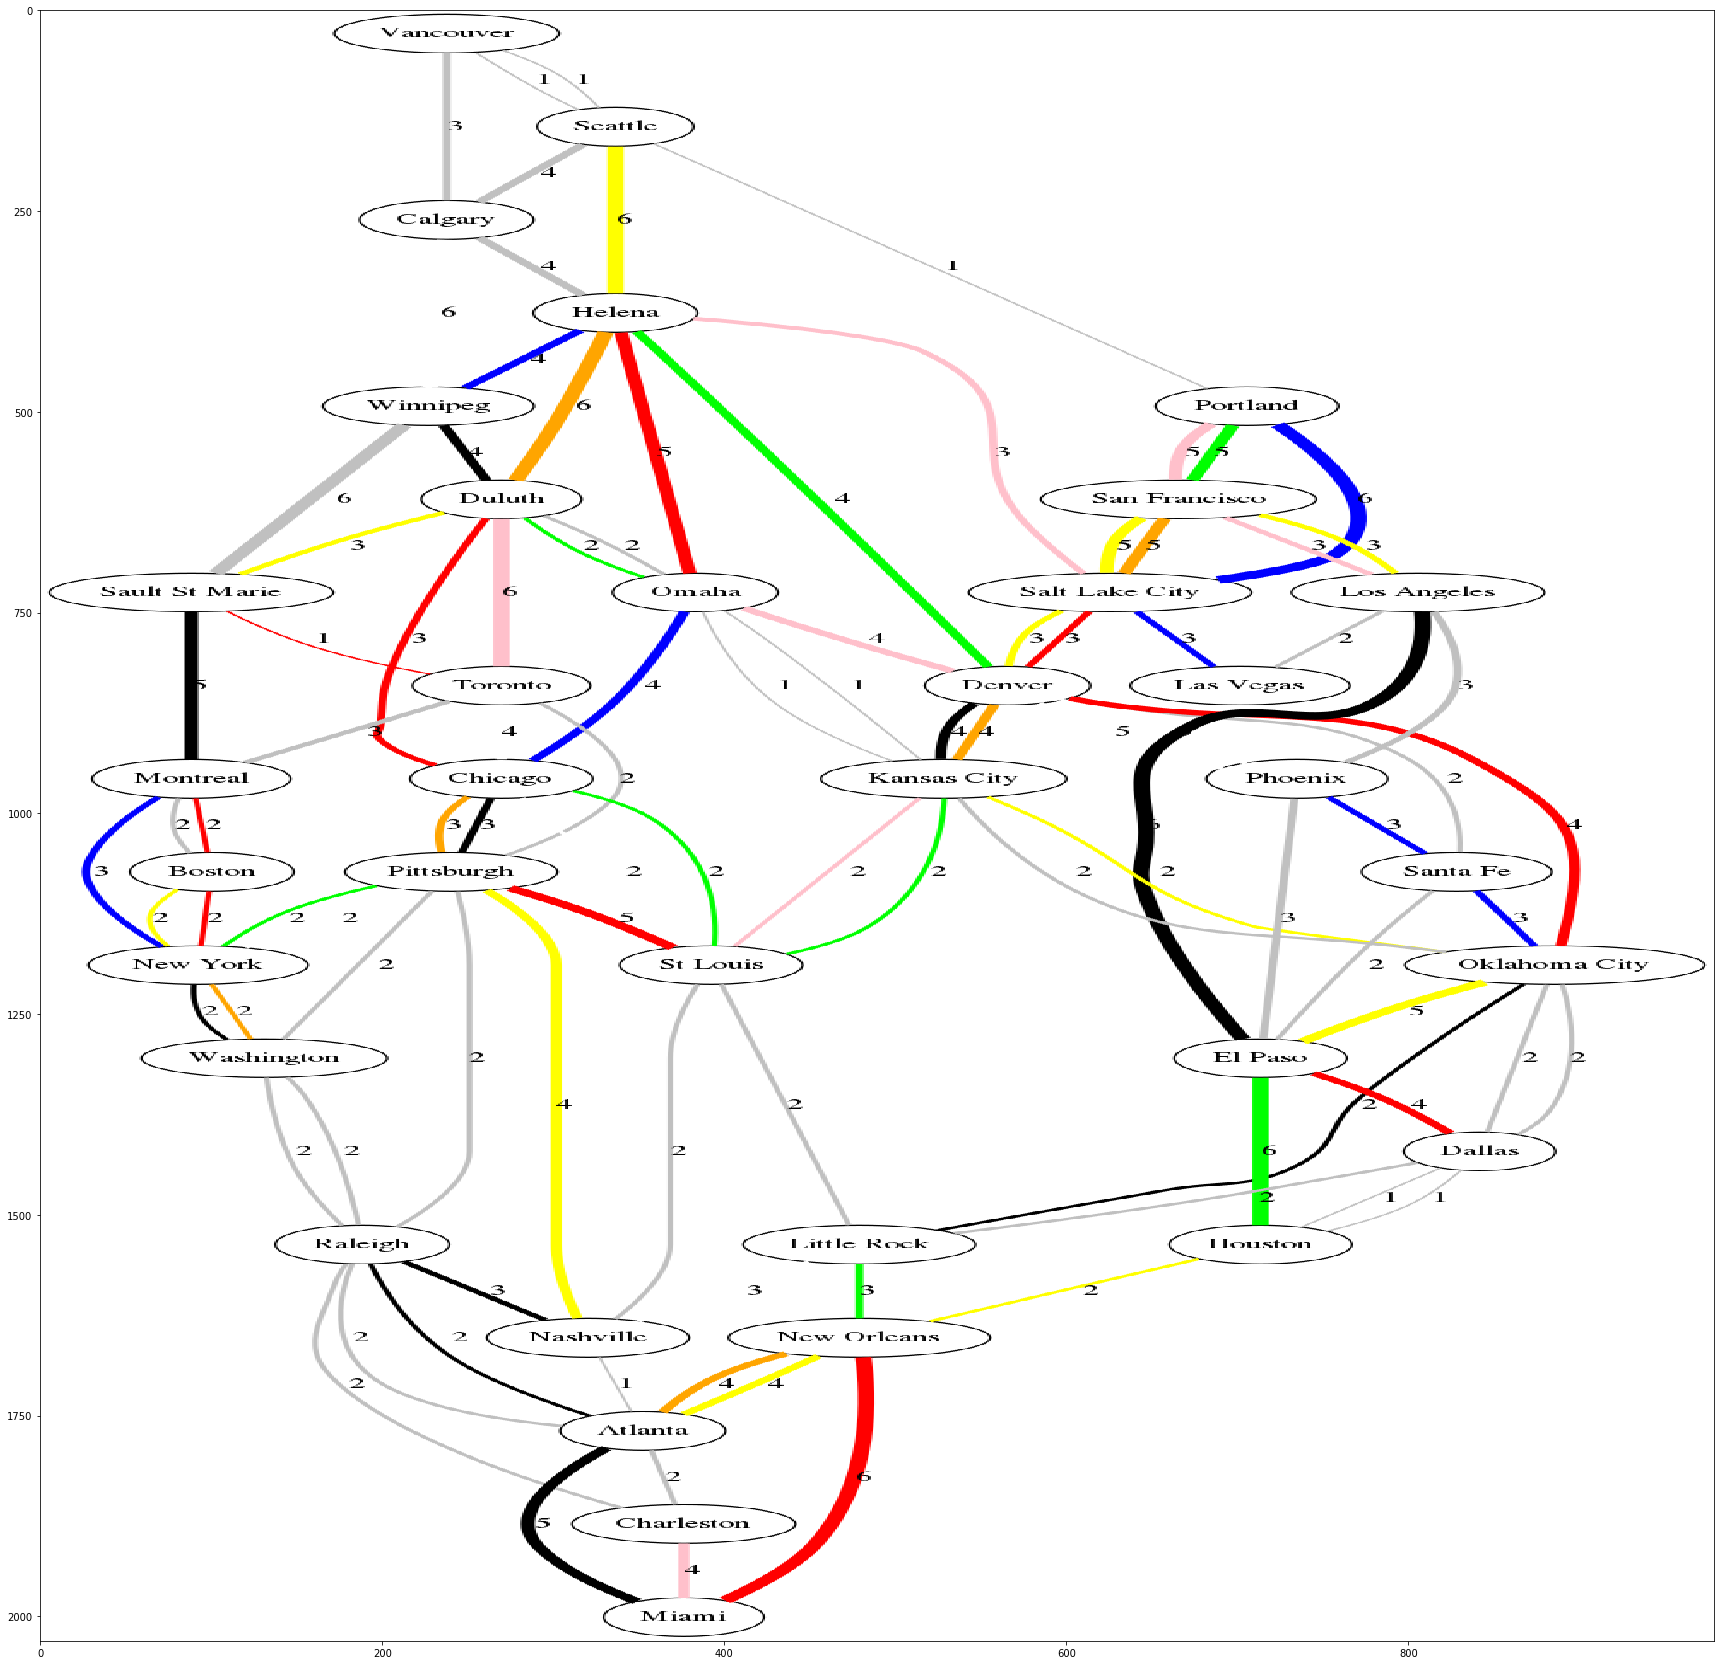

In [28]:
d = nx.drawing.nx_pydot.to_pydot(multiGraph) # d is a pydot graph object, dot options can be easily set
# attributes get converted from networkx,
# use set methods to control dot attributes after creation

png_str = d.create_png()
sio = BytesIO() # file-like string, appropriate for imread below
sio.write(png_str)
sio.seek(0)

img = mpimg.imread(sio)
plt.figure(figsize=(30,30))
imgplot = plt.imshow(img, aspect='auto')



In [23]:
df1.items

<bound method DataFrame.items of           city1  distance   color  tracks       city2
0     Vancouver         1    gray       2     Seattle
1     Vancouver         1    gray       2     Seattle
2     Vancouver         3    gray       1     Calgary
3       Seattle         1    gray       2    Portland
4       Seattle         4    gray       1     Calgary
..          ...       ...     ...     ...         ...
95  New Orleans         4  orange       2     Atlanta
96  New Orleans         6     red       1       Miami
97      Atlanta         2    gray       1  Charleston
98      Atlanta         5   black       1       Miami
99   Charleston         4    pink       1       Miami

[100 rows x 5 columns]>

In [90]:
sorted(nx.degree_centrality(multiGraph).items(), key=operator.itemgetter(1), reverse=True)[0:10]

[('Denver', 0.2857142857142857),
 ('Pittsburgh', 0.2571428571428571),
 ('Kansas City', 0.22857142857142856),
 ('Oklahoma City', 0.22857142857142856),
 ('Helena', 0.19999999999999998),
 ('Salt Lake City', 0.19999999999999998),
 ('Duluth', 0.19999999999999998),
 ('Omaha', 0.19999999999999998),
 ('Chicago', 0.19999999999999998),
 ('St Louis', 0.19999999999999998)]

In [84]:
sorted(nx.closeness_centrality(multiGraph).items(), key=operator.itemgetter(1), reverse=True)[0:10]

[('Denver', 0.3977272727272727),
 ('Omaha', 0.38461538461538464),
 ('Kansas City', 0.38461538461538464),
 ('Chicago', 0.3804347826086957),
 ('St Louis', 0.3804347826086957),
 ('Helena', 0.3763440860215054),
 ('Oklahoma City', 0.3723404255319149),
 ('Duluth', 0.3684210526315789),
 ('Little Rock', 0.3645833333333333),
 ('Pittsburgh', 0.35353535353535354)]